# Clustering des articles

In [5]:
import pandas as pd
customers = pd.read_csv('../../RecoHnM/data/customers_feature_engineered.csv')


In [4]:
import pandas as pd
articles = pd.read_csv('../../RecoHnM/data/articles_feature_engineered.csv')


In [17]:
customers.drop(columns = ['Unnamed: 0'], inplace = True)

In [19]:
customers.drop(columns = ['last_purch'], inplace = True)

In [21]:
customers

customer_id  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1        000abc5e9575b453ff1cde1e5d644f1c671daef57e0f85...   
2        0014ab7eb17199c08755faba0ccbd738996d5e1bddb0c4...   
3        00161807b400646237229582e0d2333ef150881037858b...   
4        003ab2e5af2fc89b43875961353c50d1868bfc161be428...   
...                                                    ...   
1362276  fdffda0fdadd25ffaf3b6b7129d46a76e7282d8e6072b5...   
1362277  fe397cdd088f650476004ba9b6c3f44193ac1ebd69cf2d...   
1362278  fe63e5f1bc89fd15abe6bf87e76299df911d65e47e11c2...   
1362279  ff8c321836b891009161e0b3ae61f6b32f72e8f65bd792...   
1362280  ffab13644db250377d3bcfb905465de37a4c6bd6606dc5...   

         ratio of sales_channel_id = 1  ratio of sales_channel_id = 0  \
0                             0.428571                       0.571429   
1                             0.954545                       0.045455   
2                             0.000000                       1.000000   
3                             0.139130                       0.860870   
4                             0.813333                       0.186667   
...                                ...                            ...   
1362276                       0.000000                       1.000000   
1362277                       0.000000                       1.000000   
1362278                       0.000000                       1.000000   
1362279                       0.000000                       1.000000   
1362280                       0.000000                       1.000000   

         ratio of season= 1  ratio of season = 0  ratio_of_Accessories  \
0                  0.428571             0.571429              0.047619   
1                  0.818182             0.181818              0.181818   
2                  1.000000             0.000000              0.000000   
3                  0.721739             0.278261              0.008696   
4                  0.480000             0.520000              0.053333   
...                     ...                  ...                   ...   
1362276            1.000000             0.000000              0.000000   
1362277            1.000000             0.000000              0.000000   
1362278            1.000000             0.000000              0.000000   
1362279            0.666667             0.333333              0.000000   
1362280            0.363636             0.636364              0.000000   

         ratio_of_Blouses  ratio_of_Dressed  ratio_of_Dresses Ladies  \
0                0.047619          0.238095                 0.047619   
1                0.000000          0.045455                 0.000000   
2                0.000000          0.000000                 0.000000   
3                0.034783          0.000000                 0.000000   
4                0.013333          0.000000                 0.013333   
...                   ...               ...                      ...   
1362276          0.333333          0.000000                 0.666667   
1362277          0.000000          0.000000                 0.333333   
1362278          0.000000          0.000000                 0.000000   
1362279          0.000000          0.000000                 0.000000   
1362280          0.000000          0.000000                 0.000000   

         ratio_of_Dresses/Skirts girls  ...  week_of_last_purch   age  1.0  \
0                                  0.0  ...                 102  49.0    0   
1                                  0.0  ...                 102  32.0    1   
2                                  0.0  ...                 102  33.0    0   
3                                  0.0  ...                 102  39.0    0   
4                                  0.0  ...                 102  52.0    0   
...                                ...  ...                 ...   ...  ...   
1362276                            0.0  ...                  30  60.0    0   
1362277                            0.0  ...    

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers['age'] = scaler.fit_transform(np.array(customers['age']).reshape(-1,1))


In [30]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
customers['week_of_last_purch'] = scaler.fit_transform(np.array(customers['week_of_last_purch']).reshape(-1,1))


In [32]:
customers.columns

Index(['customer_id', 'ratio of sales_channel_id = 1',
       'ratio of sales_channel_id = 0', 'ratio of season= 1',
       'ratio of season = 0', 'ratio_of_Accessories', 'ratio_of_Blouses',
       'ratio_of_Dressed', 'ratio_of_Dresses Ladies',
       'ratio_of_Dresses/Skirts girls', 'ratio_of_Jersey Basic',
       'ratio_of_Jersey Fancy', 'ratio_of_Knitwear', 'ratio_of_Outdoor',
       'ratio_of_Shirts', 'ratio_of_Shoes', 'ratio_of_Shorts',
       'ratio_of_Skirts', 'ratio_of_Socks and Tights',
       'ratio_of_Special Offers', 'ratio_of_Swimwear', 'ratio_of_Trousers',
       'ratio_of_Trousers Denim', 'ratio_of_Under-, Nightwear',
       'ratio_of_Unknown', 'ratio_of_Woven/Jersey/Knitted mix Baby',
       'quantity_purchased', 'week_of_last_purch', 'age', '1.0', '1.0.1',
       'ACTIVE', 'LEFT CLUB', 'PRE-CREATE', 'Monthly', 'Regularly', 'idk'],
      dtype='object')

In [33]:
customers.to_csv('customers_feature_engineered.csv')

In [69]:
test = pd.read_csv('../../RecoHnM/data/ksa_desc_50.csv')
articles = pd.read_csv('../../RecoHnM/data/articles_feature_engineered.csv')
articles.drop('Unnamed: 0',1,inplace = True)

#Normalize the feature 'colors', as we did not want to previously.
articles['Red'] = articles['Red'] / 255
articles['Blue'] = articles['Blue'] / 255
articles['Green'] = articles['Green'] / 255

/tmp/ipykernel_18545/487996850.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  articles.drop('Unnamed: 0',1,inplace = True)


In [70]:
articles_desc = pd.read_csv('../../raw_data/articles.csv')[['article_id','detail_desc']]
articles_desc['desc'] = articles_desc['detail_desc'] 
articles_desc.drop(columns = ['detail_desc'], inplace = True)

test['cluster_nlp_desc'] = test['kmneans_cluster']
test.drop(columns=['kmneans_cluster'],inplace = True)
test = test.merge(articles_desc,on = 'desc')
test.head()

desc  cluster_nlp_desc  \
0            Jersey top with narrow shoulder straps.                31   
1            Jersey top with narrow shoulder straps.                31   
2            Jersey top with narrow shoulder straps.                31   
3  Microfibre T-shirt bra with underwired, moulde...                 6   
4  Microfibre T-shirt bra with underwired, moulde...                 6   

   article_id  
0   108775015  
1   108775044  
2   108775051  
3   110065001  
4   110065002

In [72]:
articles = articles.merge(test[['cluster_nlp_desc','article_id']],on = 'article_id')

<AxesSubplot:ylabel='Frequency'>

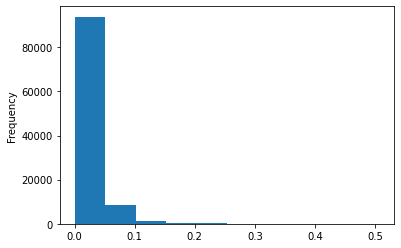

In [99]:
articles['price'].plot.hist()

In [102]:
articles.to_csv('articles_feature_engineered.csv')

In [77]:
len(articles)

104131

In [80]:
articles.drop(columns = ['cluster_nlp_desc'],inplace = True)

In [97]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
articles.prices = scaler.fit_transform(np.array(articles.price).reshape(-1,1))


/tmp/ipykernel_18545/553956533.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  articles.prices = scaler.fit_transform(np.array(articles.price).reshape(-1,1))


In [100]:
articles.prices.mean()

0.05597975670194952

In [31]:
import numpy as np
import pandas as pd

In [101]:
articles

article_id  Denim  Patterns  Solid  adult  teenager  kid  baby  male  \
0        108775015      0         0      1      1         0    0     0     0   
1        108775044      0         0      1      1         0    0     0     0   
2        108775051      0         1      0      1         0    0     0     0   
3        110065001      0         0      1      1         0    0     0     0   
4        110065002      0         0      1      1         0    0     0     0   
...            ...    ...       ...    ...    ...       ...  ...   ...   ...   
104126   952267001      0         1      0      1         0    0     0     0   
104127   952938001      0         1      0      1         0    0     0     0   
104128   953450001      0         1      0      1         0    0     0     0   
104129   953763001      0         0      1      1         0    0     0     0   
104130   956217002      0         0      1      1         0    0     0     0   

        female  ...  Skirts  Socks and Tights  Special Offers  Swimwear  \
0            0  ...       0                 0               0         0   
1            0  ...       0                 0               0         0   
2            0  ...       0                 0               0         0   
3            0  ...       0                 0               0         0   
4            0  ...       0                 0               0         0   
...        ...  ...     ...               ...             ...       ...   
104126       0  ...       0                 1               0         0   
104127       0  ...       0                 0               0         0   
104128       0  ...       0                 1               0         0   
104129       0  ...       0                 0               0         0   
104130       0  ...       0                 0               0         0   

        Trousers  Trousers Denim  Under-, Nightwear  Unknown  \
0              0               0                  0        0   
1              0               0                  0        0   
2              0               0                  0        0   
3              0               0                  1        0   
4              0               0                  1        0   
...          ...             ...                ...      ...   
104126         0               0                  0        0   
104127         0               0                  0        0   
104128         0               0                  0        0   
104129         0               0                  0        0   
104130         0               0                  0        0   

        Woven/Jersey/Knitted mix Baby     price  
0                                   0  0.008142  
1                                   0  0.008114  
2                                   0  0.004980  
3                                   0  0.020219  
4                                   0  0.018205  
...                               ...       ...  
104126                              0  0.014982  
104127                              0  0.048006  
104128                              0  0.016836  
104129                              0  0.021908  
104130                              0  0.059152  

[104131 rows x 36 columns]

In [29]:
articles = pd.read_csv('articles_processed.csv')

articles.drop('Unnamed: 0',1,inplace = True)

articles['Red'] = articles['Red'] / 255
articles['Blue'] = articles['Blue'] / 255
articles['Green'] = articles['Green'] / 255


#articles_no_id = articles.drop('article_id',1)






articles




/tmp/ipykernel_18545/3373386485.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  articles.drop('Unnamed: 0',1,inplace = True)


article_id  Denim  Patterns  Solid  adult  teenager  kid  baby  male  \
0        108775015      0         0      1      1         0    0     0     0   
1        108775044      0         0      1      1         0    0     0     0   
2        108775051      0         1      0      1         0    0     0     0   
3        110065001      0         0      1      1         0    0     0     0   
4        110065002      0         0      1      1         0    0     0     0   
...            ...    ...       ...    ...    ...       ...  ...   ...   ...   
104542   952267001      0         1      0      1         0    0     0     0   
104543   952938001      0         1      0      1         0    0     0     0   
104544   953450001      0         1      0      1         0    0     0     0   
104545   953763001      0         0      1      1         0    0     0     0   
104546   956217002      0         0      1      1         0    0     0     0   

        female  ...  Skirts  Socks and Tights  Special Offers  Swimwear  \
0            0  ...       0                 0               0         0   
1            0  ...       0                 0               0         0   
2            0  ...       0                 0               0         0   
3            0  ...       0                 0               0         0   
4            0  ...       0                 0               0         0   
...        ...  ...     ...               ...             ...       ...   
104542       0  ...       0                 1               0         0   
104543       0  ...       0                 0               0         0   
104544       0  ...       0                 1               0         0   
104545       0  ...       0                 0               0         0   
104546       0  ...       0                 0               0         0   

        Trousers  Trousers Denim  Under-, Nightwear  Unknown  \
0              0               0                  0        0   
1              0               0                  0        0   
2              0               0                  0        0   
3              0               0                  1        0   
4              0               0                  1        0   
...          ...             ...                ...      ...   
104542         0               0                  0        0   
104543         0               0                  0        0   
104544         0               0                  0        0   
104545         0               0                  0        0   
104546         0               0                  0        0   

        Woven/Jersey/Knitted mix Baby     price  
0                                   0  0.008142  
1                                   0  0.008114  
2                                   0  0.004980  
3                                   0  0.020219  
4                                   0  0.018205  
...                               ...       ...  
104542                              0  0.014982  
104543                              0  0.048006  
104544                              0  0.016836  
104545                              0  0.021908  
104546                              0  0.059152  

[104547 rows x 36 columns]

In [21]:
from sklearn.cluster import KMeans
# Configuring the parameters of the clustering algorithm
KMeans_cluster = KMeans(n_clusters=50)
# Fitting the clustering algorithm
KMeans_cluster.fit(articles_no_id)

# Adding the results to a new column in the dataframe
articles["cluster_KNN"] = KMeans_cluster.labels_

In [22]:
for i in range(50):
    print(len(articles[articles['cluster_KNN'] == i]))

729
1815
1135
1701
2765
2329
1981
2842
1504
2264
2467
3990
1487
871
1726
3280
3847
2433
1973
2653
4150
1244
1891
1605
1749
1625
2474
3889
1553
2870
2143
1569
1517
2092
2122
1337
2152
1855
1152
1052
1898
3686
1894
1843
773
2035
2456
3287
1744
1098


Let us print a few pictures to see whether our guess seems fine.

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# imshow all of the items bought by a given customer.
def display_pictures_articles(list_of_articles):
    for article_id in list_of_articles:
        folder = '0'+str(article_id)[0:2]
        img = mpimg.imread('../../raw_data/images/'+folder+'/0' + str(article_id) +'.jpg')
        imgplot = plt.imshow(img)
        plt.show()

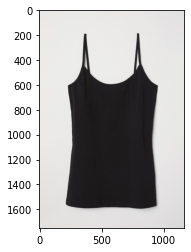

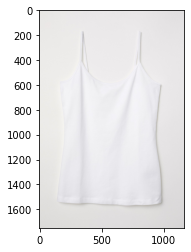

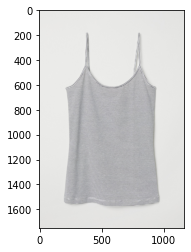

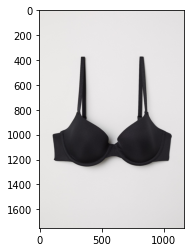

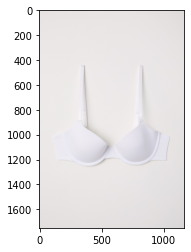

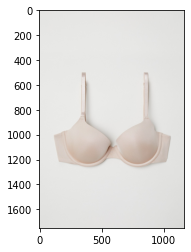

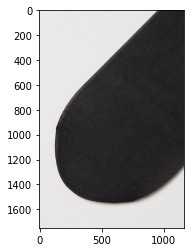

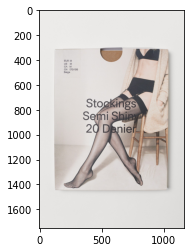

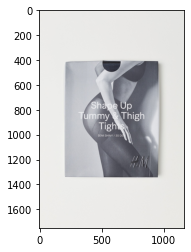

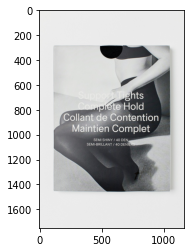

In [21]:
display_pictures_articles(list(articles.article_id)[0:10])

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# imshow all of the items bought by a given customer.
def display_cluster(cluster_ref,number_items):
    for i in range(number_items):
        articles_cluster = articles[articles['cluster_KNN'] == cluster_ref]
        article_id =  str(int(articles_cluster.iloc[i]['article_id']))
        folder = '0'+article_id[0:2]
        img = mpimg.imread('../raw_data/images/'+folder+'/0' + article_id +'.jpg')
        imgplot = plt.imshow(img)
        plt.show()


In [13]:
articles_cluster = articles[articles['cluster_KNN'] == 1]
str(articles_cluster.iloc[0]['article_id'])

'145872051.0'

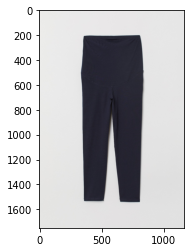

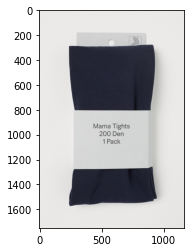

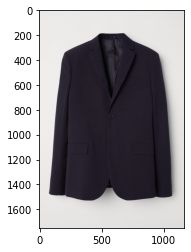

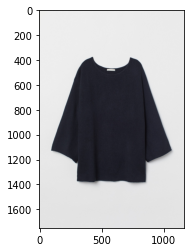

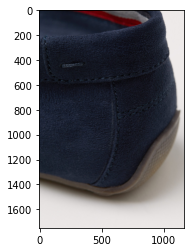

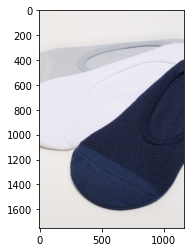

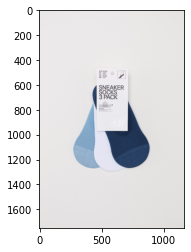

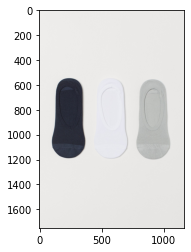

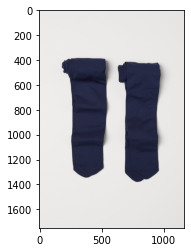

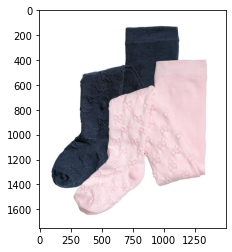

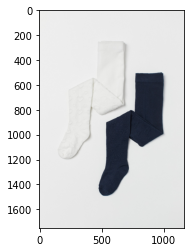

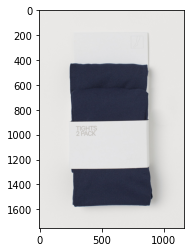

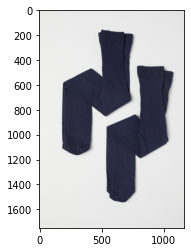

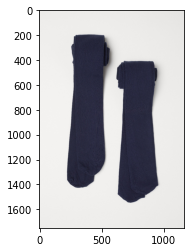

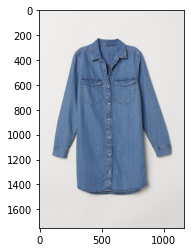

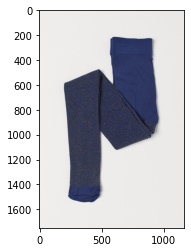

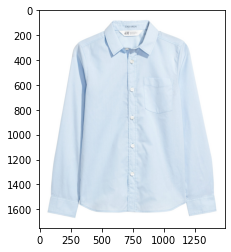

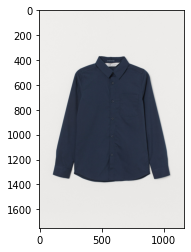

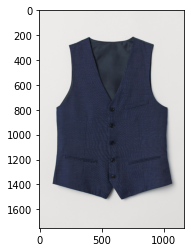

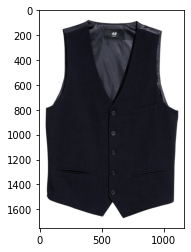

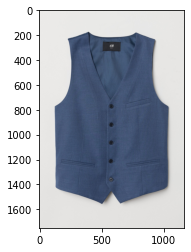

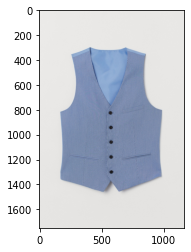

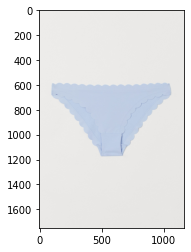

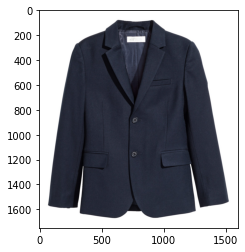

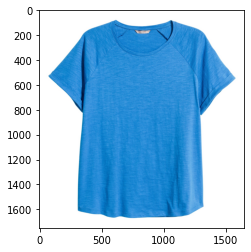

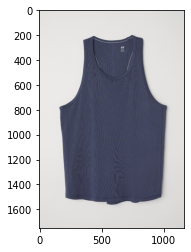

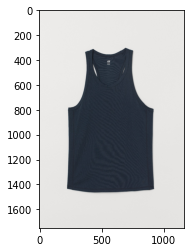

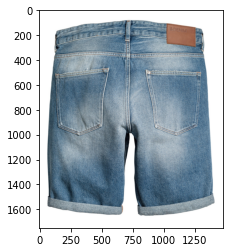

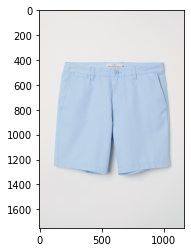

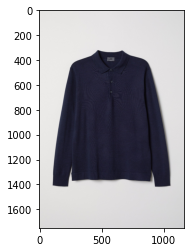

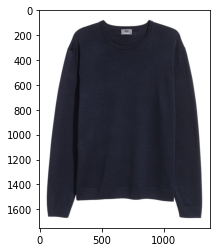

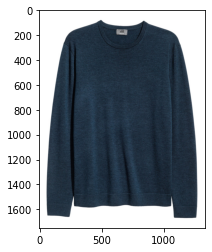

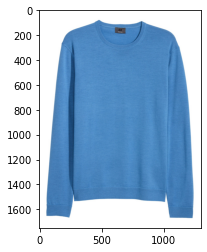

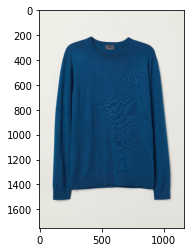

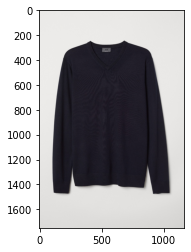

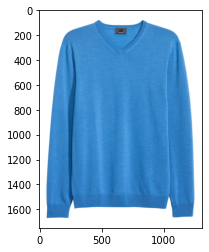

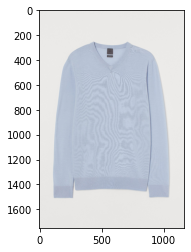

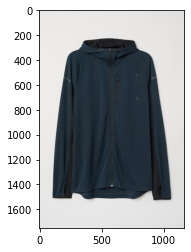

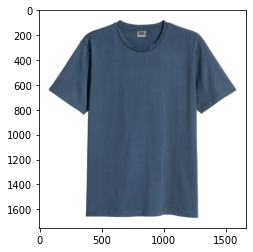

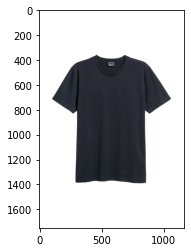

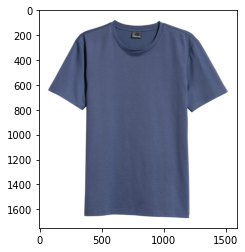

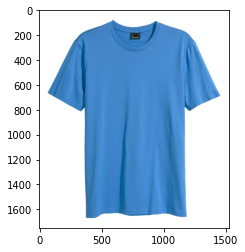

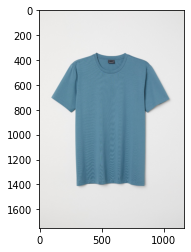

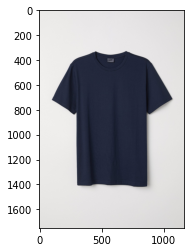

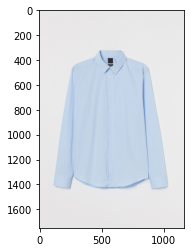

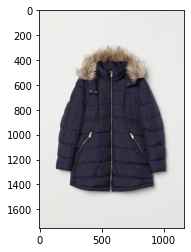

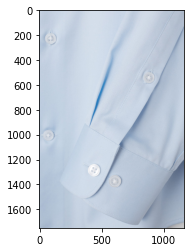

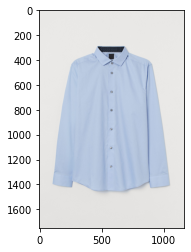

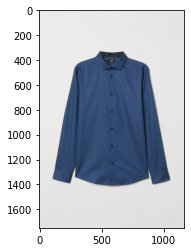

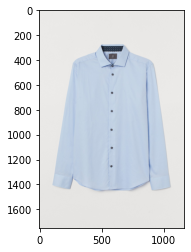

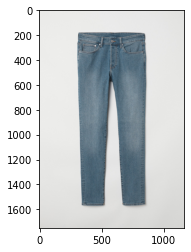

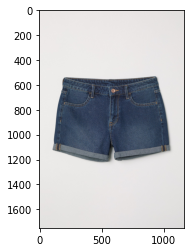

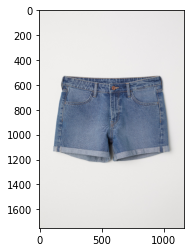

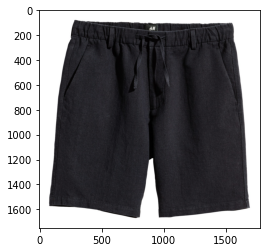

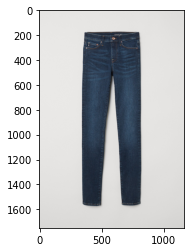

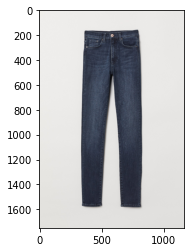

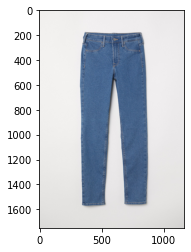

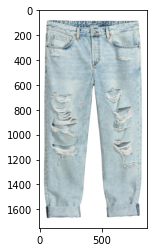

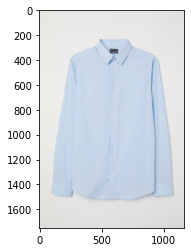

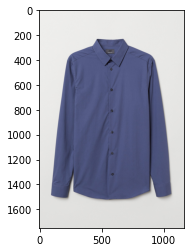

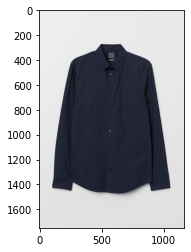

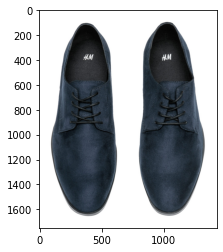

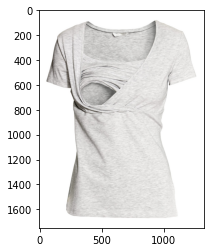

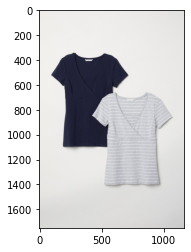

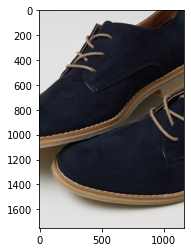

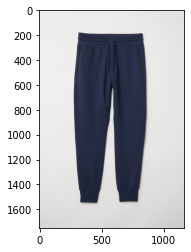

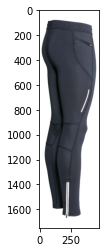

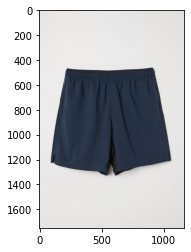

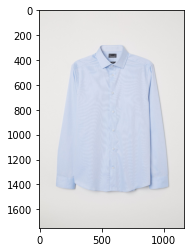

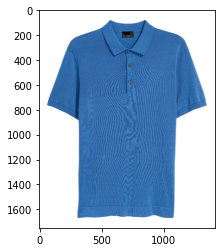

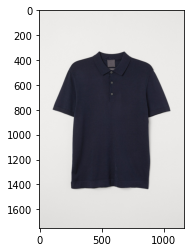

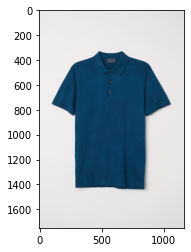

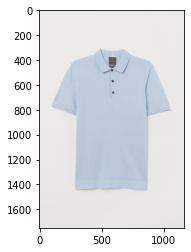

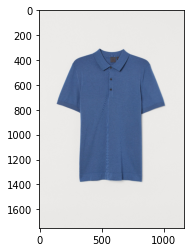

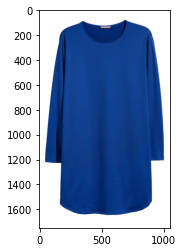

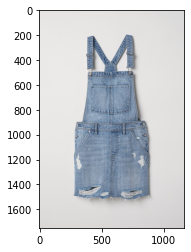

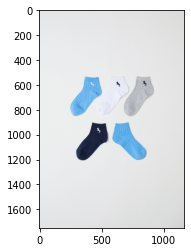

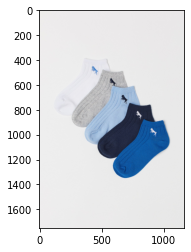

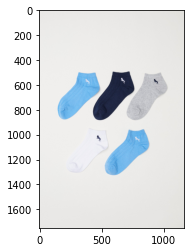

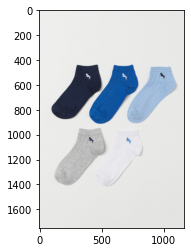

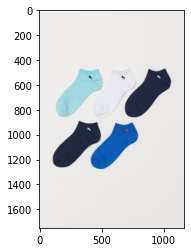

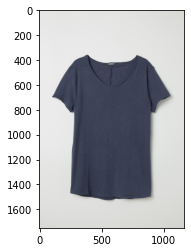

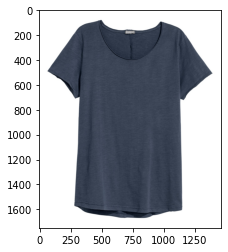

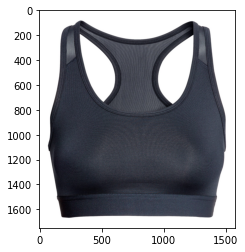

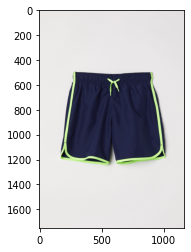

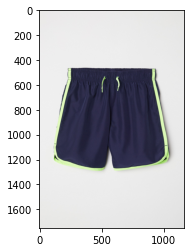

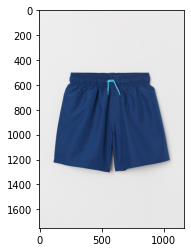

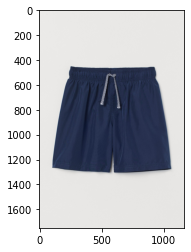

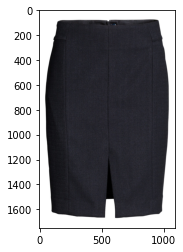

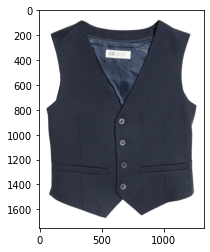

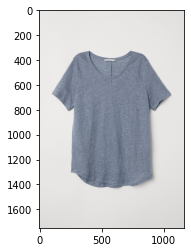

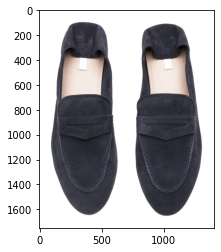

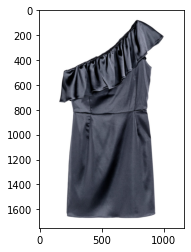

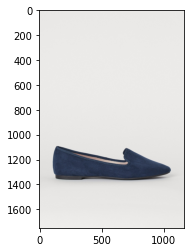

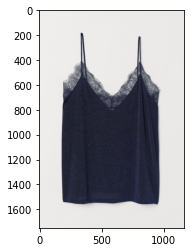

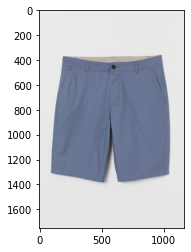

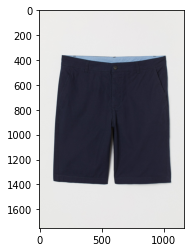

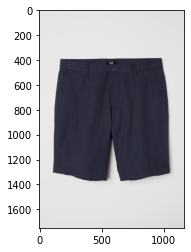

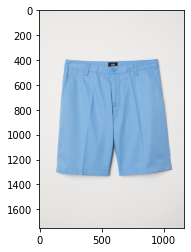

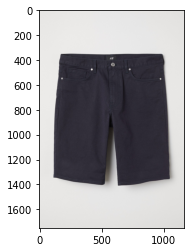

In [24]:
display_cluster(1,100)

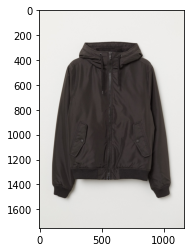

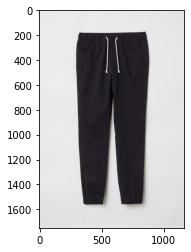

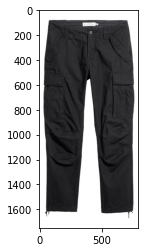

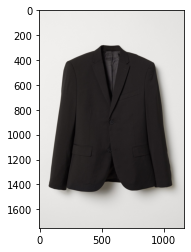

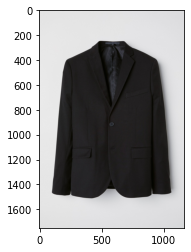

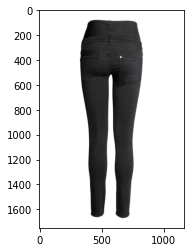

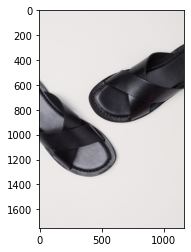

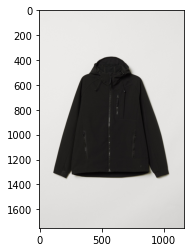

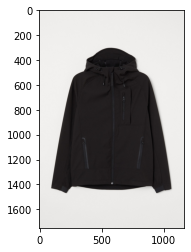

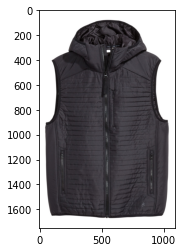

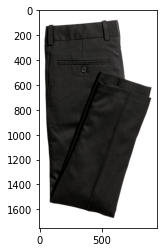

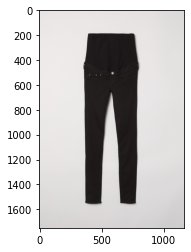

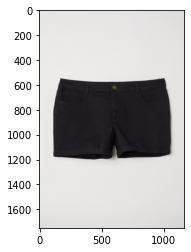

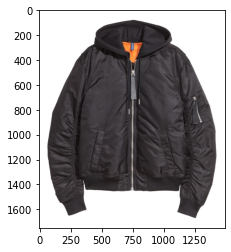

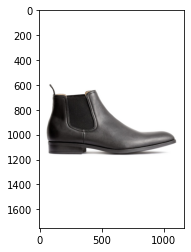

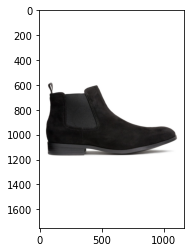

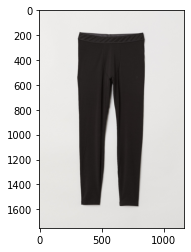

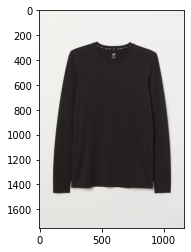

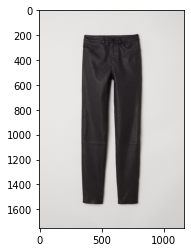

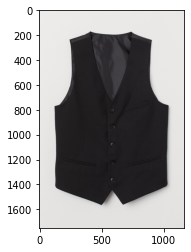

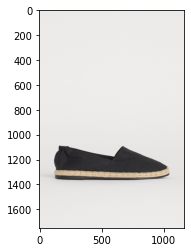

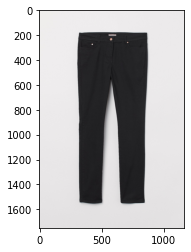

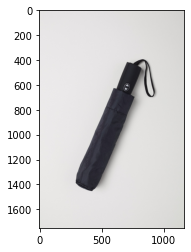

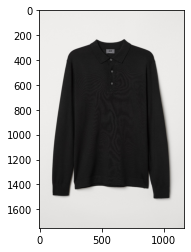

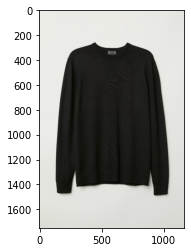

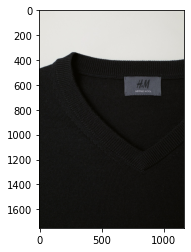

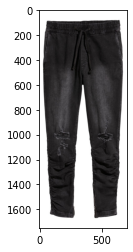

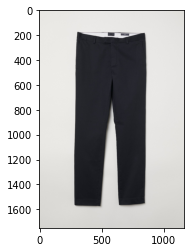

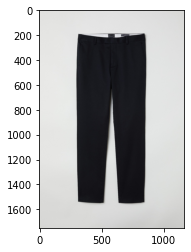

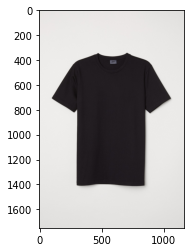

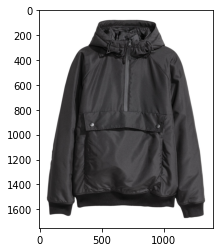

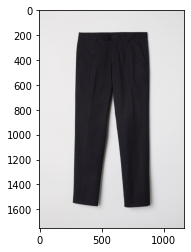

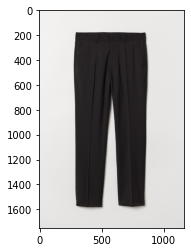

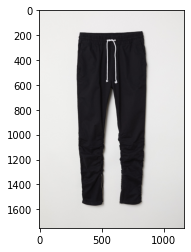

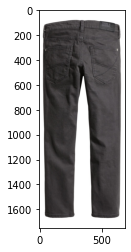

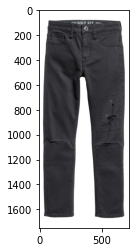

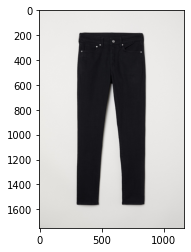

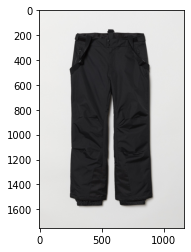

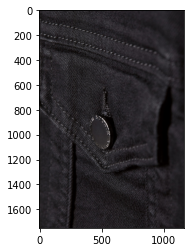

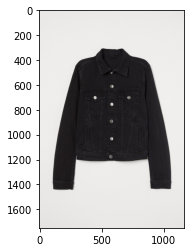

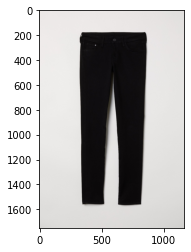

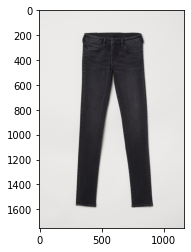

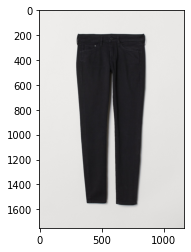

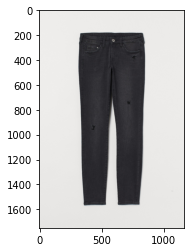

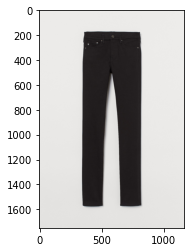

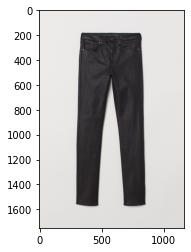

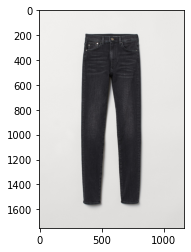

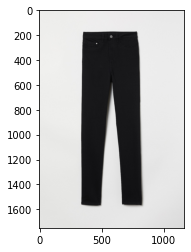

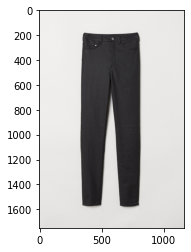

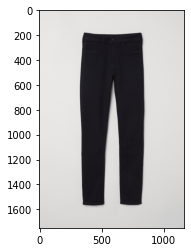

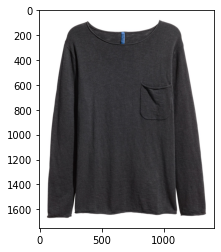

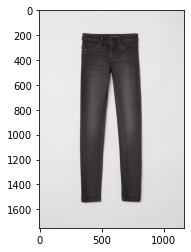

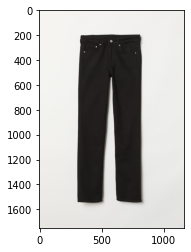

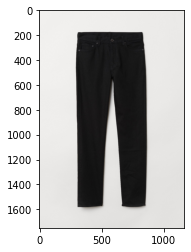

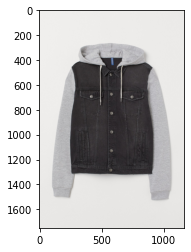

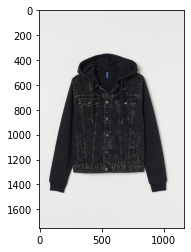

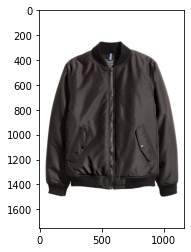

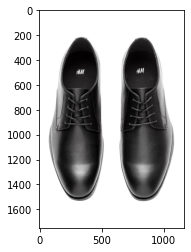

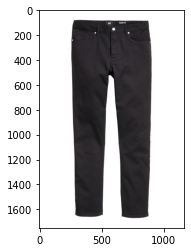

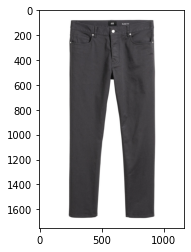

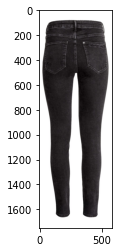

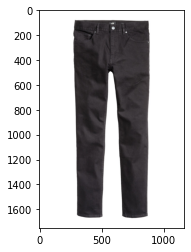

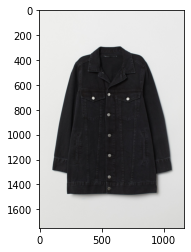

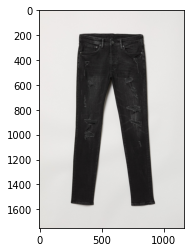

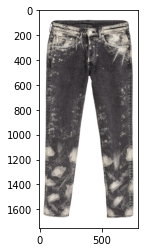

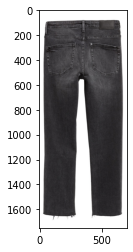

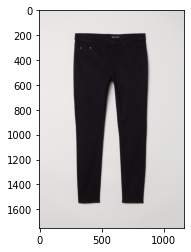

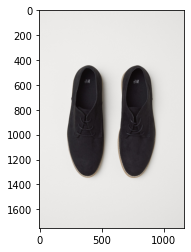

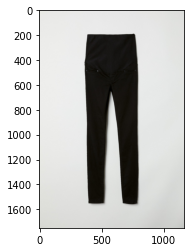

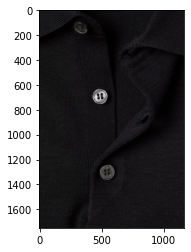

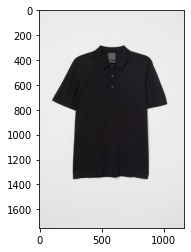

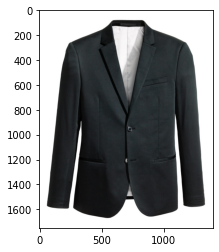

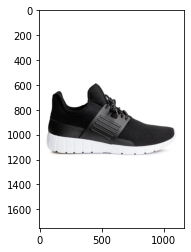

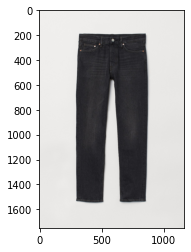

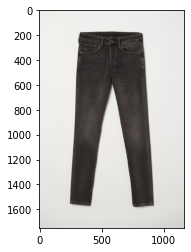

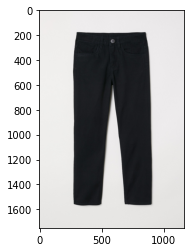

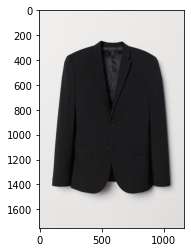

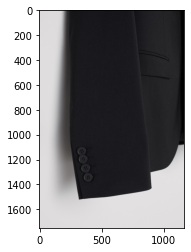

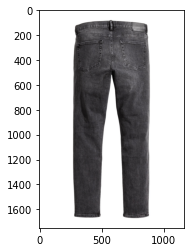

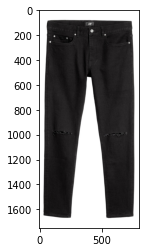

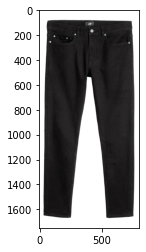

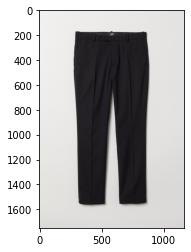

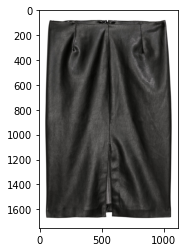

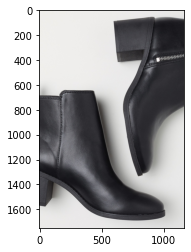

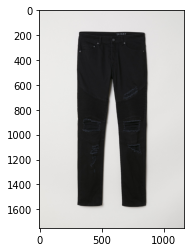

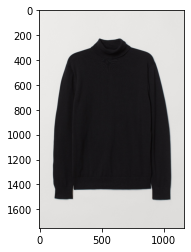

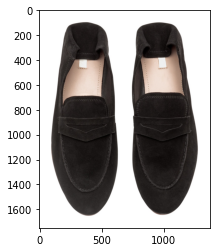

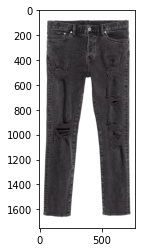

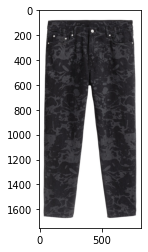

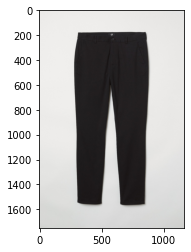

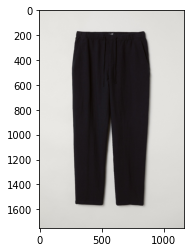

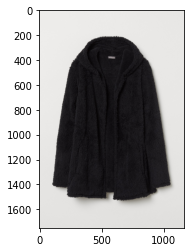

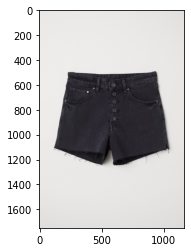

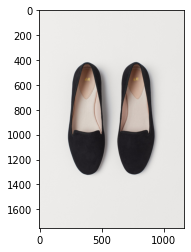

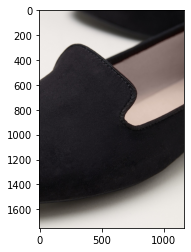

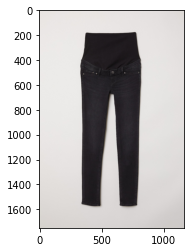

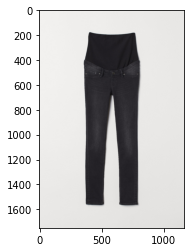

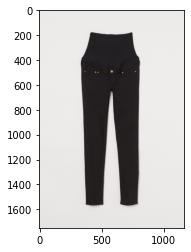

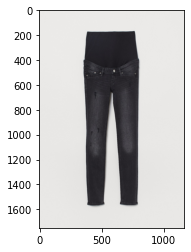

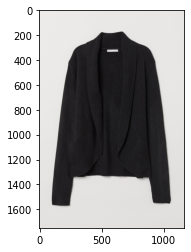

In [23]:
display_cluster(43,100)

In [15]:
articles

article_id  Denim  Patterns  Solid  adult  teenager  kid  baby  male  \
0        108775015      0         0      1      1         0    0     0     0   
1        108775044      0         0      1      1         0    0     0     0   
2        108775051      0         1      0      1         0    0     0     0   
3        110065001      0         0      1      1         0    0     0     0   
4        110065002      0         0      1      1         0    0     0     0   
...            ...    ...       ...    ...    ...       ...  ...   ...   ...   
104542   952267001      0         1      0      1         0    0     0     0   
104543   952938001      0         1      0      1         0    0     0     0   
104544   953450001      0         1      0      1         0    0     0     0   
104545   953763001      0         0      1      1         0    0     0     0   
104546   956217002      0         0      1      1         0    0     0     0   

        female  ...  Socks and Tights  Special Offers  Swimwear  Trousers  \
0            0  ...                 0               0         0         0   
1            0  ...                 0               0         0         0   
2            0  ...                 0               0         0         0   
3            0  ...                 0               0         0         0   
4            0  ...                 0               0         0         0   
...        ...  ...               ...             ...       ...       ...   
104542       0  ...                 1               0         0         0   
104543       0  ...                 0               0         0         0   
104544       0  ...                 1               0         0         0   
104545       0  ...                 0               0         0         0   
104546       0  ...                 0               0         0         0   

        Trousers Denim  Under-, Nightwear  Unknown  \
0                    0                  0        0   
1                    0                  0        0   
2                    0                  0        0   
3                    0                  1        0   
4                    0                  1        0   
...                ...                ...      ...   
104542               0                  0        0   
104543               0                  0        0   
104544               0                  0        0   
104545               0                  0        0   
104546               0                  0        0   

        Woven/Jersey/Knitted mix Baby     price  cluster_KNN  
0                                   0  0.008142           19  
1                                   0  0.008114           23  
2                                   0  0.004980           28  
3                                   0  0.020219           19  
4                                   0  0.018205           23  
...                               ...       ...          ...  
104542                              0  0.014982            1  
104543                              0  0.048006            8  
104544                              0  0.016836            1  
104545                              0  0.021908           41  
104546                              0  0.059152           41  

[104547 rows x 37 columns]

In [30]:
articles.to_csv('articles_feature_engineered.csv')

In [37]:
articles.to_csv('articles_clusterized_normalized.csv')